In [104]:
import networkx as nx
from networkx.algorithms import approximation as approx
import pandas as pd
import math
import numpy as np

[[ 4 14]
 [ 6  0]
 [15  4]
 [14 12]
 [ 5  7]
 [ 9 11]
 [ 2 15]
 [ 7 10]
 [ 9  0]
 [14  1]
 [ 4 11]
 [14 13]
 [ 6 14]
 [ 9 13]
 [ 8  8]
 [ 4  4]
 [ 7 12]
 [15  0]
 [ 0  6]
 [ 8  1]
 [11 14]
 [ 3  1]
 [ 8  7]
 [ 8  9]
 [ 1  2]
 [12  7]
 [13 15]
 [ 0 13]
 [10  0]
 [ 4 10]
 [ 8 11]
 [ 1  6]
 [ 4  9]
 [14 11]
 [15 13]
 [ 9  1]
 [ 6  5]
 [ 2  1]
 [11  4]
 [ 9  8]
 [ 4 12]
 [ 0 11]
 [15 14]
 [ 5 11]
 [13  2]
 [ 2  4]
 [ 0  1]
 [ 3  4]
 [ 7 13]
 [ 9 12]
 [ 1 11]
 [ 6  2]
 [15  8]
 [ 4  5]
 [ 7  3]
 [12 13]
 [ 8  6]
 [11  8]
 [15  7]
 [12  3]
 [ 5  6]
 [12 10]
 [ 5 15]
 [14  7]
 [ 1 14]
 [ 0  9]
 [12  6]
 [ 2 11]
 [ 9  4]
 [ 2  7]
 [14  9]
 [ 5  4]
 [13  8]
 [13  6]
 [ 3  7]
 [ 6 15]
 [ 1  7]
 [ 3 15]
 [10  5]
 [13  1]
 [10 10]
 [ 2  5]
 [15  6]
 [ 5  0]
 [ 8  3]
 [ 4  8]
 [10  9]
 [ 2 10]
 [ 1  4]
 [10 11]
 [ 5  5]
 [11 13]
 [13 14]
 [15  1]
 [12  0]
 [ 3  2]
 [12  1]
 [10  2]
 [ 0  7]
 [ 6  1]]
[(0, 4), (0, 5), (0, 6), (0, 7), (0, 10), (0, 12), (0, 13), (0, 14), (0, 16), (0, 20), (0, 23), (0,

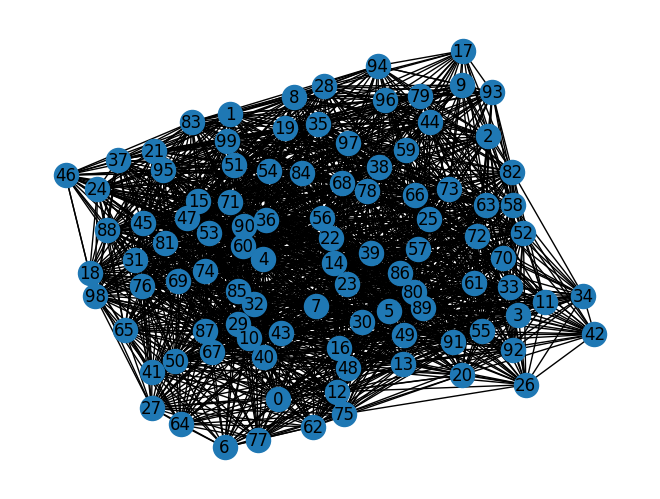

In [ ]:
data = pd.read_csv("property_grid.csv")
x = data["x"].values
y = data["y"].values
coordinates = np.array((x,y)).T
print(coordinates)
radius = 7.5 #fixed for testing
#TODO: timing

G = nx.Graph()
    
# Add nodes with their positions
for idx, coord in enumerate(coordinates):
    G.add_node(idx, pos=coord)

n = len(coordinates)
for i in range(n):
    for j in range(i + 1, n):
        if math.hypot(coordinates[i][0] - coordinates[j][0], 
                        coordinates[i][1] - coordinates[j][1]) <= radius:
            G.add_edge(i, j)

In [ ]:
#initial graph (test example)
# atomlist =  [
#     (1, 2),
#     (2, 3),
#     (1, 4),
#     (3, 4)
# ]
# G = nx.Graph(atomlist)
colors = ["red", "blue", "green", "yellow", "magenta", "cyan", "orange", "purple"]
color_dict = {} #nodes matched to colors
color_counter = 0
G1 = G.copy()
while (G1.number_of_nodes() > 0):
    mis = approx.maximum_independent_set(G1)  
    for node in mis:
        color_dict[node] = colors[color_counter]
    G1.remove_nodes_from(mis)
    color_counter+=1
    
#convert color dict to color list for correct order
color_list = [""]*len(color_dict)
for node in color_dict:
    color_list[node - 1] = color_dict[node]

#show final graph
pos = nx.spring_layout(G, iterations=100, seed=42)
nx.draw(
   G,
   pos=pos,
   with_labels=True, #testing
   node_color=color_list
)

In [ ]:
# testing
# G = nx.Graph(
#     [
#         (1, 2),
#         (2, 3),
#         (1, 4),
#         (3, 4)
#     ]
# )

# mis = approx.maximum_independent_set(G)
# print(mis)

# pos = nx.spring_layout(G, iterations=100, seed=42)
# nx.draw(
#     G,
#     pos=pos,
#     with_labels=True,
#     node_color=["tab:red" if n in mis else "tab:blue" for n in G],
# )